In [1]:
from pydens import Solver, NumpySampler
import numpy as np
import torch

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Define the equation as a callable.
from pydens import Solver, D, V, ConvBlockModel
from pydens import NumpySampler as NS
def pde(f, x, y):
    return D(D(f, x), x) + D(D(f, y), y) - 5 * torch.sin(np.pi * (x + y))

# Supply the equation, initial condition, the number of variables (`ndims`)
# and the configration of neural network in Solver-instance.
solver = Solver(equation=pde, ndims=2, boundary_condition=1,
                layout='fa fa fa f', activation='Tanh', units=[10, 12, 15, 1])

In [4]:
solver.fit(batch_size=100, niters=1500)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:58<00:00, 25.51it/s]


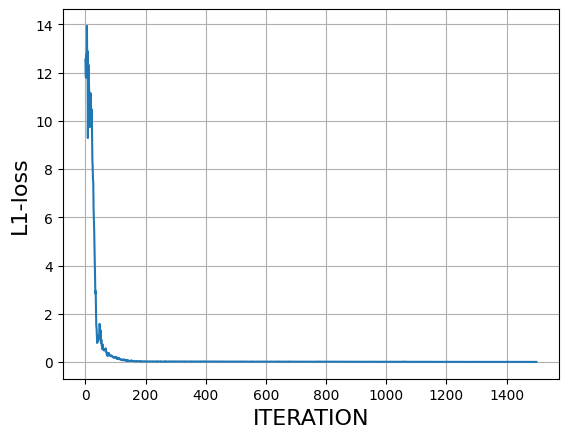

In [11]:
import matplotlib.pyplot as plt
def plot_loss(loss):
    plt.plot(loss)
    plt.grid()
    plt.xlabel('ITERATION', fontsize=16)
    plt.ylabel('L1-loss', fontsize=16)
    plt.show()
plot_loss(solver.losses[:])

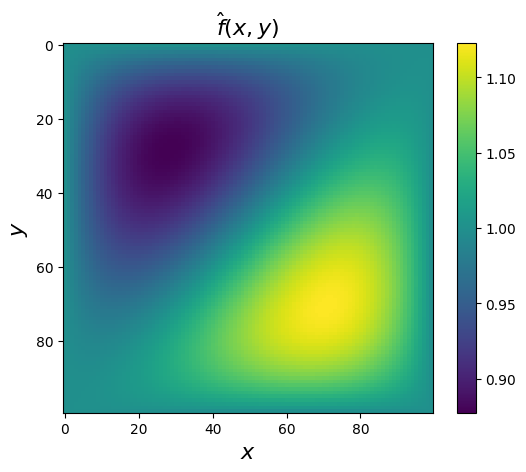

In [12]:
def cart_prod(*arrs):
    """ Get array of cartesian tuples from arbitrary number of arrays.
    """
    grids = np.meshgrid(*arrs, indexing='ij')
    return np.stack(grids, axis=-1).reshape(-1, len(arrs))

def plot_approximation_2d(approximation):
    plt.imshow(approximation)
    plt.colorbar()
    plt.title(r'$\hat{f}(x, y)$', fontsize=16)
    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$y$', fontsize=16)
    plt.show()
grid = cart_prod(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
approxs = solver.predict(grid[:, 0:1], grid[:, 1:2]).reshape((100, 100))

plot_approximation_2d(approxs)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:47<00:00,  4.39it/s]


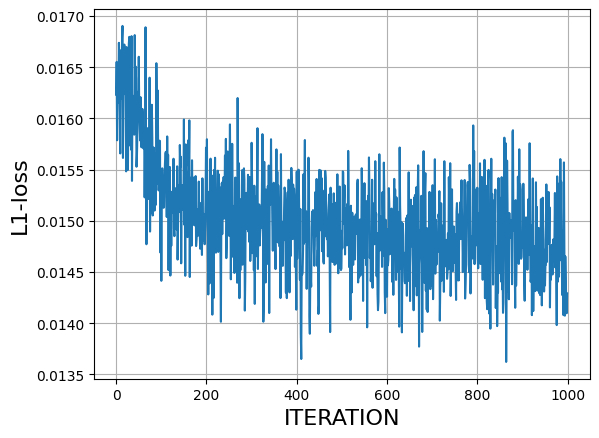

In [28]:
def pde(f, x1,x2, y):
    return D(f, x1)*(-torch.pow(x1,3) + x2) + D(f, x2)*(-x1 - x2) + D(f, y)*(-torch.pow(x1,3) + x2) - .5 * torch.pow((y-x1),2)


solver = Solver(equation=pde, ndims=3, boundary_condition=0,
                layout='fa fa fa fa f', activation='Softsign', units=[20, 32, 32, 15, 1])

solver.fit(batch_size=8000, niters=1000)
import matplotlib.pyplot as plt

plot_loss(solver.losses[:])

In [43]:
grid = cart_prod(np.linspace(0, 1, 100), np.linspace(0, 1, 100), np.linspace(0, 1, 100))
approxs = solver.predict(grid[:, 0:1], grid[:, 1:2], grid[:, 2:3]).reshape((100, 100, 100))

approxs

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  3.11987355e-06,  5.95314259e-06, ...,
          3.17245831e-05,  1.60553209e

In [41]:
approxs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(grid[:, 0:1], grid[:, 1:2], approxs[:,:,0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [36]:
np.shape(approxs)

(100, 100, 100)